<a href="https://colab.research.google.com/github/geetanshgoel2-coder/Assesment3/blob/main/Assessment_3_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Fashion MNIST CNN

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import gzip
import os

In [40]:
# Clone the Fashion-MNIST GitHub repository
!git clone https://github.com/zalandoresearch/fashion-mnist.git > /dev/null 2>&1

# Path to data files
path = "fashion-mnist/data/fashion"

# Helper functions to load data manually from .gz files
def load_images(filename):
    with gzip.open(filename, 'rb') as f:
        f.read(16)  # skip header
        data = np.frombuffer(f.read(), dtype=np.uint8)
        data = data.reshape(-1, 28, 28, 1)
        data = data / 255.0  # normalize pixels
        return data

def load_labels(filename):
    with gzip.open(filename, 'rb') as f:
        f.read(8)  # skip header
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

In [41]:
# Load train and test data
x_train = load_images(os.path.join(path, 'train-images-idx3-ubyte.gz'))
y_train = load_labels(os.path.join(path, 'train-labels-idx1-ubyte.gz'))
x_test = load_images(os.path.join(path, 't10k-images-idx3-ubyte.gz'))
y_test = load_labels(os.path.join(path, 't10k-labels-idx1-ubyte.gz'))

print("Train data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# Class labels
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


Train data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


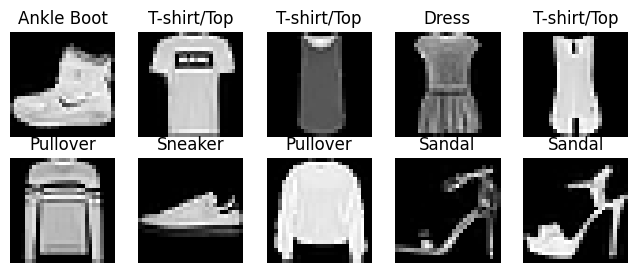

In [42]:
# Show a few training images
plt.figure(figsize=(8,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [43]:
#Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [44]:
# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=1)

# Evaluate model performance
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", round(test_acc, 3))

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step - accuracy: 0.7673 - loss: 0.6591 - val_accuracy: 0.8613 - val_loss: 0.3675
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.8789 - loss: 0.3313 - val_accuracy: 0.8948 - val_loss: 0.2860
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9004 - loss: 0.2729 - val_accuracy: 0.9002 - val_loss: 0.2753
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9091 - loss: 0.2453 - val_accuracy: 0.9047 - val_loss: 0.2629
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9181 - loss: 0.2190 - val_accuracy: 0.9015 - val_loss: 0.2656
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9267 - loss: 0.1938 - val_accuracy: 0.9088 - val_loss: 0.2499
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9348 - loss: 0.1754 - val_accuracy: 0.9057 - val_loss: 0.2615
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9429 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


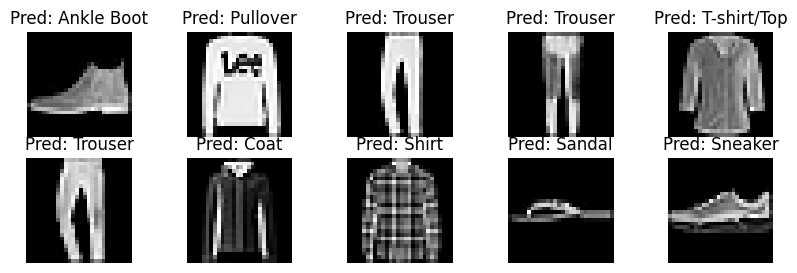

In [45]:
# Sample images
predictions = model.predict(x_test[:10])

plt.figure(figsize=(10,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title("Pred: " + class_names[np.argmax(predictions[i])])
    plt.axis('off')
plt.show()